# Woods-Saxon spectrum challenge

The purpose of this challenge is for you to build the single particle spectrum of a Woods-Saxon potential with a spin-orbit term. Our Hamiltonian is:

$$
\left[ -\frac{\hbar^2}{2m}\frac{d^2}{dr^2} + \frac{\hbar^2}{2m}\frac{\ell(\ell+1)}{r^2} + V_\text{eff}(r,\alpha) - E \right] \phi(r) = 0~,
$$

where the effective potential is:

$$
V_\text{eff}(r,\alpha)=V_\text{WS}(r) +(\vec \ell\cdot\ \vec s) V_\text{SO}(r)
$$

where the Woods-Saxon term is defined as:

$$
V_\text{WS}(r,\alpha) = V\Big[1+\text{exp}\Big( \frac{r-R}{a}\Big)  \Big]^{-1},
$$

and the spin orbit is:
$$
V_\text{SO}(r,\alpha) = V_\text{SO}r_0^2\frac{1}{r}\frac{d}{dr}\Big[1+\text{exp}\Big( \frac{r-R}{a}\Big)  \Big]^{-1},
$$


The spin orbit term, for the nucleons inside the nucleus which are spin 1/2 particles, is:

$$
(\vec \ell\cdot\ \vec s) = \ell\frac{1}{2} \ \ \ \text{ if } j = \ell + 1/2 \text{ (aligned spin)} \\
(\vec \ell\cdot\ \vec s) = -(\ell+1)\frac{1}{2} \ \  \text{ if } j = \ell - 1/2 \text{ (anti aligned spin)}.
$$

We are going to take the parameters from previous estimations [Nuclear Structure (in 2 volumes), Bohr, Aage Niels and Mottelson, Ben R, page 238]:

$$
r_0=1.27 \text{ fm} \\
R=r_0A^{1/3} \\ 
a=0.67 \text{ fm} \\
V=\big[-51+33(N-Z)/A\big] \text{ MeV} \\
V_\text{SO}=-0.44V
$$

Your tasks are to:

- Build a numerical solver to get the wave functions and energies of the above Hamiltonian for different values of $\ell$.
- Choose a nucleus -$^{48}\text{Ca}$ or $^{208}\text{Pb}$  will be good choices- and compute the single particle orbits for the neutrons (since we are ignoring the Coulomb interaction). You should make a function that iterates over the different shells -values of $\ell$ and $j$- up to a value $L_\text{Max}$, and gets all the possible states for each $\ell$ up to a value $N_\text{Max}$. Good values would be $L_\text{Max} = 10$ and $N_\text{Max}=10$. After all this is obtained, your algorithm should iterate over the different energy levels in ascending order, filling them with the corresponding number of nucleons available. Remember that you can put up to $2j+1$ particles on a shell with total spin $j$ for the different aligments of the $z$ projection.
- Bonus challenge: add a Coulomb term to the Hamiltonian and repeat the analysis for the protons. 

Bellow you will find the code used to solve the Harmonic Oscillator example from the other challenge. You can use it to start building your solver for the Woods-Saxon case. Be sure to include the $\ell$ and $j$ dependence. Also, your "x" grid will become an "r" grid, and beyond the irrelevant change of names, you should make sure r goes between 0 (or a small number like 0.001) to a positive $r_\text{max} \approx 10$, instead of being negative like "x" is bellow.

In [1]:
#Once you defined a system (N,Z), be sure to initialize these parameters

# R=1.27*A^(1/3)
# a=0.67
# V=(-51+33*(N-Z)/A)
# VSO=-0.44*V

In [2]:
import numpy as np

import matplotlib.pyplot as plt




In [3]:
def generate_second_derivative_matrix(xgrid):
    N = len(xgrid)
    dx = xgrid[1]-xgrid[0]
    
    # Generate the matrix for the second derivative using a five-point stencil
    main_diag = np.ones(N) * (-5.0 /2 / dx**2)
    off_diag = np.ones(N - 1)* 4/3 / dx**2
    off_diag2 = np.ones(N - 2) * (-1.0 / (12 * dx**2))
    
    D2 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1) + np.diag(off_diag2, k=2) + np.diag(off_diag2, k=-2)
    

    
    return D2

In [4]:
def generate_potential_matrix(xgrid):
    return np.diag(xgrid**2)

In [5]:
def HO_solver(kappa,D2Mat,vpot):
    
    H = -D2Mat + kappa*vpot
    evals,evects = np.linalg.eigh(H)
    
    return [evals[0],evects.T[0]]

In [6]:
#Example of a fixed grid

x_max = 10.0  # Maximum coordinate value for the grid

N_grid=150
# Set up the coordinate grid
x = np.linspace(-x_max, x_max, N_grid)

D20=generate_second_derivative_matrix(x)
V0=generate_potential_matrix(x)

In [7]:
kappa0=2

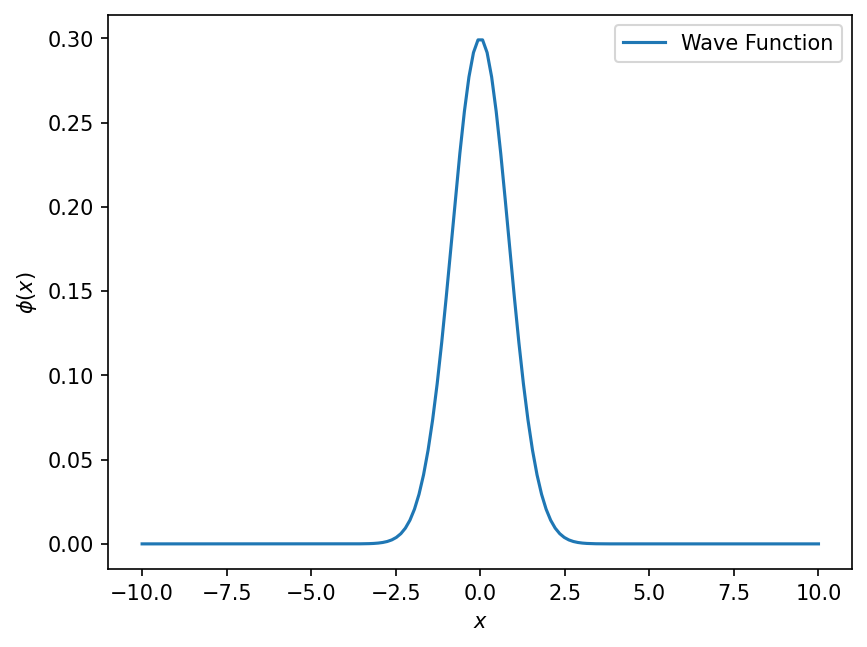

In [8]:
fig = plt.figure(dpi=150)

plt.plot(x,HO_solver(kappa0,D20,V0)[1],label='Wave Function')

plt.legend()
plt.ylabel(r'$\phi(x)$')
plt.xlabel(r'$x$');

plt.show()



In [ ]:
# Rest of the smart code goes here, good luck!